Creating SMILES mapping
- https://pubchem.ncbi.nlm.nih.gov/

In [1]:
nuc2smiles=dict(zip(
    ['A','T','G','C'],
    
    ["C1=NC2=NC=NC(=C2N1)N",
    "CC1=CNC(=O)NC1=O",
    "C1=NC2=C(N1)C(=O)NC(=N2)N",
    "C1=C(NC(=O)N=C1)N"]
    ))

In [3]:
import json

with open('nuc2smiles.json', 'w') as json_file:
    json.dump(nuc2smiles, json_file)

In [5]:
pip install rdkit-pypi

     |████████████████████████████████| 16.1 MB 3.5 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit import DataStructs
import numpy as np
import json

class Fingerprint_Generation:
    def __init__(self, smiles_file, radius, nbits, newsmiles=None):
        with open(smiles_file) as json_file:
            smiles = json.load(json_file)
        
        self.lookupfps = {}
        
        if newsmiles != None:
            smiles.update(newsmiles)
        
        for key, value in smiles.items():
            mol = Chem.MolFromSmiles(value)
            fp = np.array(Chem.GetMorganFingerprintAsBitVect(mol,radius,nbits))
            self.lookupfps[key] = fp
        self.lookupfps[' '] = np.zeros(self.lookupfps['A'].shape, dtype=int)
        self.lookupfps['0'] = np.zeros(self.lookupfps['A'].shape, dtype=int)
    
    def seq(self, seq):
        fp = np.asarray([self.lookupfps[seq[i]] for i in range(len(seq))])
        return fp

In [34]:

# nuc2smiles=dict(zip(
#     ['A','T','G','C'],
    
#     ["C1=NC2=NC=NC(=C2N1)N",
#     "CC1=CNC(=O)NC1=O",
#     "C1=NC2=C(N1)C(=O)NC(=N2)N",
#     "C1=C(NC(=O)N=C1)N"]
#     ))

smiles_path = 'nuc2smiles.json'

fp_radius = 3# kwargs.get('fp_radius', 3)
fp_bits = 2048 #kwargs.get('fp_bits', 2048)
fp = Fingerprint_Generation(smiles_file = smiles_path, 
                                    nbits = fp_bits, radius = fp_bits)


In [35]:
example_seq='TTTTAGGGCTTGAAGGAGTTCGCTGCACGCGCACGCACACACATACACACACACACAAAATCTTAAAAAAAAAGAGCGCCGAGCATGCGCACAGAGAGGATGCCATATTGGAATGAGCTGTAGTGGGAGCCGGAGGACCGGAGCGGGCGCGCGAGGGAGGCGGCGGGCGGGGAGCGAGCGGGCAAGGGCGGGCGAGCGAGCAAGCGAGCGAGGCTGCCCTCCCGGGCGGCAGCAGCACT'

In [36]:
a=fp.seq(example_seq)
a.shape

(239, 2048)

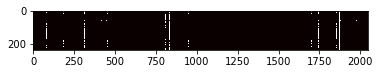

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()
